In [7]:
#from zumi.zumi import Zumi
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import IFrame
import time
import pandas as pd
import hvplot.streamz
#from hvplot import renderer
from streamz import Stream
from streamz.dataframe import DataFrame as sDataFrame
import param
import panel as pn
pn.extension()

In [18]:
# Run if not on zumi
from PIL import Image
class Zumi(object):
    def __init__(self):
        print("Zumi Initialised")
    
    def forward(self):
        print("Zumi Forward")
        
    def reverse(self):
        print("Zumi Reverse")
        
    def turn_left(self):
        print("Zumi Turn Left")
        
    def turn_right(self):
        print("Zumi Turn Right")
        
    def get_all_IR_data(self):
        return np.random.randint(1,200, size=(6))
    
    def all_lights_on(self):
        print("Light set on!")

    def all_lights_off(self):
        print("Light set off!")
        
    def get_battery_percentage(self):
        return np.random.randint(70,100)
    
class Camera(object):
    def __init__(self):
        print("Camera Initialised")
        
    def capture(self):
        image = Image.open("images/"+random.choice(os.listdir("images")))
        return np.asarray(image)
    
    def clear_output(self):
        a = 1

    
zumi = Zumi()
camera = Camera()

Zumi Initialised
Camera Initialised


In [48]:
zumi = Zumi()


#Dashboard Beschriftung
dashboard_title = pn.pane.Markdown('## ZumiDashboard')
dashboard_desc = 'An Dashboard for controlling a little Zumi Robot in the HS-Offenburg'


#Steuerung der Fahrtrichtungen des Autos
straight = pn.widgets.Button(name='Forward', button_type='primary')
def go_forward(self):
    print('forward')
    self.zumi.forward()

straight.on_click(go_forward)

backward = pn.widgets.Button(name='Backward', button_type='primary')
def go_backward(event):
    zumi.reverse()

backward.on_click(go_backward)

left = pn.widgets.Button(name='Turn Left', button_type='primary')
def go_left(event):
    zumi.turn_left()

left.on_click(go_left)


right = pn.widgets.Button(name='Turn Right', button_type='primary')
def go_right(event):
    zumi.turn_right()

right.on_click(go_right)



#FrontLichter an/aus
headlights_on  = pn.widgets.Button(name='Headlights On', button_type='success')
def headlight_on(event):
    zumi.headlights_on()

headlights_on.on_click(headlight_on)

headlights_off  = pn.widgets.Button(name='Headlights Off', button_type='danger')
def headlight_off(event):
    zumi.headlights_on()

headlights_off.on_click(headlight_off)



#Speichern Button
save = pn.widgets.Button(name='Save Data', button_type='warning')
def save_data(event):
    ir_data.to_csv('ir_data.csv', index=False)

save.on_click(save_data)


#Sensor Data Output and Plots
#df = pd.DataFrame({'front_right': zumi.get_IR_data(0),
#        'bottom_right': zumi.get_IR_data(1),
#       'back_right': zumi.get_IR_data(2),
#       'bottom_left': zumi.get_IR_data(3),
#       'back_left': zumi.get_IR_data(4),
#       'front_left': zumi.get_IR_data(5)}, index=[0])
##df = pd.DataFrame(data, columns=['front_right', 'bottom_right', 'back_right', 'bottom_left', 'back_left', 'front_left'])


index = pd.DatetimeIndex([])



def emit_ir_data(df):
    
    read = zumi.get_all_IR_data();
    new = pd.DataFrame([read], columns=columns, index=pd.DatetimeIndex([pd.datetime.now()]))
    
    df.append(new)

    return df







data = zumi.get_all_IR_data();
columns = ['front right','bottom right','back right','bottom left','back left','front left']


index = pd.DatetimeIndex([])

df = pd.DataFrame([data], columns=columns)



stream = Stream()
stream.map(emit_ir_data(df))


sdf = sDataFrame(stream, example=df)

#def line_plots(data):
#    figure = plt.figure()
#    plt.subplot(3,2,1)
#    plt.plot(df['front_right'])

#    plt.subplot(3,2,2)
#    plt.plot(df['bottom_right'])

#    plt.subplot(3,2,3)
#    plt.plot(df['back_right'])

#    plt.subplot(3,2,4)
#    plt.plot(df['bottom_left'])

#    plt.subplot(3,2,5)
#    plt.plot(df['back_left'])

#    plt.subplot(3,2,6)
#    plt.plot(df['front_left'])
    
#    return figure
    


front_right_data = sdf['front_right']

#plot_front_right = pn.pane.Streamz(front_right_data, height=350, always_watch=True)
plot_front_right = pn.pane.Streamz(stream.map(emit_ir_data), height=350, always_watch=True)

#plot_front_right = front_right.hvplot.line(width=400)


plot_front_right.add_periodic_callback(emit, period=1000)


#ir_data = plt.figure()
#plt.subplot(3,2,1)
#plt.plot(df['front_right'])

#plt.subplot(3,2,2)
#plt.plot(df['bottom_right'])

#plt.subplot(3,2,3)
#plt.plot(df['back_right'])

#plt.subplot(3,2,4)
#plt.plot(df['bottom_left'])

#plt.subplot(3,2,5)
#plt.plot(df['back_left'])

#plt.subplot(3,2,6)
#plt.plot(df['front_left'])

#plt.show()
#plt.scatter(df['label'], df['value'], s=1000, marker='_', color='red')


#Battery
battery_percentage = zumi.get_battery_percentage()
battery_text = "Batteriestatus: " +  str(battery_percentage) + " Volt"



#Camera Window
#camera = Camera(image_w=60,image_h=32)
#camera.start_camera()
camera = IFrame('https://keuper-labs.org/zumi-cam', width=660, height=500)

#test = zumi.get_IR_data(1)
text = pn.widgets.TextInput(value='Ready')

button = pn.widgets.Button(name='Click me', button_type='primary')

def b(event):
    text.value = 'Clicked {0} times'.format(button.clicks)

button.on_click(b)

Zumi Initialised


C:\Users\Jonas Zimmer\anaconda3\lib\site-packages\ipykernel_launcher.py:78: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


KeyError: 'front_right'

In [42]:
print(ir_data['front right'])

Series - elements like:
Series([], Name: front right, dtype: int64)


In [41]:
print(ir_data)

DataFrame - elements like:
Empty DataFrame
Columns: [front right, bottom right, back right, bottom left, back left, front left]
Index: []


Column
    [0] Markdown(str)
    [1] Markdown(str)
    [2] Row
        [0] Column
            [0] Button(button_type='primary', name='Forward')
            [1] Row
                [0] Button(button_type='primary', name='Turn Left')
                [1] Button(button_type='primary', name='Turn Right')
            [2] Button(button_type='primary', name='Backward')
            [3] Row
                [0] Button(button_type='success', name='Headlights On')
                [1] Button(button_type='danger', name='Headlights Off')
            [4] Row
                [0] Markdown(str)
            [5] Matplotlib(Figure)
            [6] Button(button_type='warning', name='Save Data')
        [1] Column
            [0] HTML(IFrame)
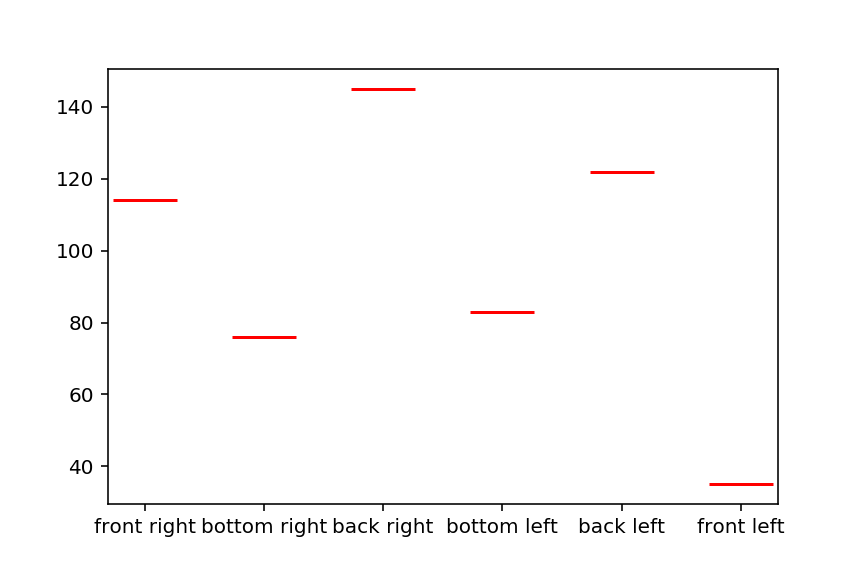

In [19]:
dashboard = pn.Column(
        dashboard_title, 
        dashboard_desc,
        pn.Row(
            pn.Column(
                straight,
                pn.Row(
                    left,
                    right,
                ),
                backward,
                pn.Row(
                    headlights_on,
                    headlights_off,
                ),
                pn.Row(
                    battery_text,
                ),
                pn.Row(
                    plot_pane
                ),
                save,
            ),pn.Column(
                camera
            ),
        ),
    )

dashboard